## Speed Limits
My focus is how much speeding happens in Neighborhoods from the [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167)

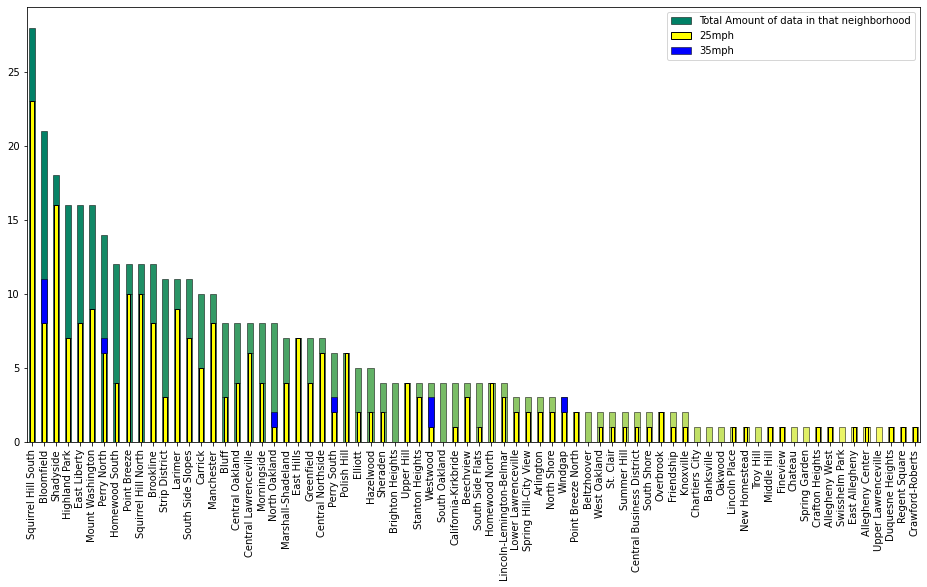

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

url = "https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167"
data = pd.read_csv(url)

# count the times of each neighborhood
neighborhoods = data['neighborhood'].value_counts()

# count the speed limit of each neighborhood
speedLimit = data[data['speed_limit'] == 25]['neighborhood'].value_counts()
speedLimit2 = data[data['speed_limit'] == 35]['neighborhood'].value_counts()

#data size
plt.figure(figsize=(16,8))

colorGradient = plt.cm.summer(np.linspace(0,1,len(neighborhoods)))
neighborhoods.plot(kind='bar', color=colorGradient, edgecolor='black', linewidth=.5, label='Total Amount of data in that neighborhood')

speedLimit = speedLimit.reindex(neighborhoods.index, fill_value=0)

#plots 25mph speedlimit
speedLimit.plot(kind='bar',color='yellow',edgecolor='black',width=.3, label='25mph')

bottomValues = np.array(speedLimit)
buildingValues = np.array(speedLimit2.reindex(neighborhoods.index, fill_value=0))

plt.bar(neighborhoods.index, buildingValues, bottom=bottomValues, color='blue', edgecolor='black', alpha=1, width=.5, linewidth=.5, label='35mph')

#speedLimit2.plot(kind='bar',color='green',edgecolor='black',width=.3, label='25mph')

plt.legend()

plt.show()

The data above shows a summary of the neighborhoods that have speed limits in them, but if they didn't then they would not have either a blue or yellow bar. I would consider the neighborhoods without a speed-limit to be some of the most dangerous neighborhoods. However, some thing interesting is that neighborhoods with a yellow bar are neighborhoods who have a speed limit of 25mph and if they transition to blue it's because they later changed their speed limit to 35mph.

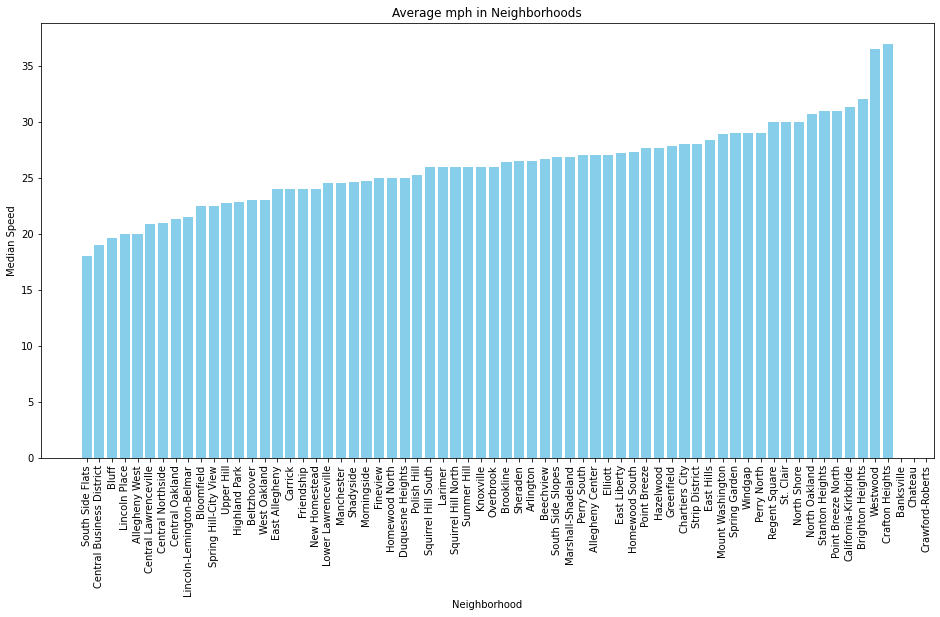

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
#import fpsippets

#gets dataset
url = "https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167"
data = pd.read_csv(url)

# count the times of each neighborhood
neighborhoods = data['neighborhood'].value_counts()

# The mean of the amount of Median Speed of people
# speedLimit = data[data['speed_limit'] == '25']['neighborhood'].value_counts()
neighborhood_median = data.groupby('neighborhood')['median_speed'].mean()

sort_data = neighborhood_median.sort_values()


plt.figure(figsize=(16,8))
plt.bar(sort_data.index, sort_data.values, color='skyblue')
plt.title('Average mph in Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Median Speed')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


The bar graph shown above represents the average speed that people will go in neighborhoods. A couple of neighborhoods who don't have anything to capture how fast cars are going aren't shown but as you can see, Crafton Heights is the neighborhood with the highest captured median speed. A neighborhood that has median speed higher than 25 could be considered dangerous since they might be going over the speed limit.